# Unsupervised Machine Learning Project using Natural Language Processing (NLP)

# Topic : Netflix Reviews Sentiment Analysis
##### Creator : Farhan Wily B.Sc.

Dataset Link from Kaggle:
- https://www.kaggle.com/datasets/ashishkumarak/netflix-reviews-playstore-daily-updated/data

## 1. Exploratory Data Analysis (EDA)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import emoji
import plotly.express as px
import mplcursors
import re

### a. Data Preprocessing

#### a1. Read Dataset

In [2]:
# Read the dataset
df = pd.read_csv('D:/Project Wily/Machine Learning/Netflix Review/dataset/netflix_reviews.csv')
#df = pd.read_csv('F:/Project Wily/Machine Learning/Netflix Review/dataset/netflix_reviews.csv')

In [3]:
# Show the dataset
df.head(10)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,7b2a264c-7bb5-4729-b3d2-2168f8a7855e,Kyan Ball,I pay $18/month for an app that's super glitch...,2,1,8.122.1 build 9 50736,2024-07-10 15:20:28,8.122.1 build 9 50736
1,10faea27-b33d-40bb-b669-cf126438d525,Shraddha Pawar,Netflix plzz this kdrama dubbed in hindi . Hap...,5,2,8.122.1 build 9 50736,2024-07-10 15:03:37,8.122.1 build 9 50736
2,61a10e0d-e868-4d87-aa30-f41d30285a3f,badr mosa,Terrible app I can't watch anything because of...,1,0,8.121.2 build 22 50727,2024-07-08 15:41:17,8.121.2 build 22 50727
3,1a7ce341-afc6-46da-9d08-793582e8ed3c,Ivan Berry,"I love 💕💕 to download it,,😭",5,0,NaN,2024-07-07 17:47:19,NaN
4,1bd445c3-7f36-4717-810a-63c5533207d0,Ryan Murray,Exceptional,5,1,8.121.2 build 22 50727,2024-07-07 12:31:53,8.121.2 build 22 50727
5,59f306cd-852b-4459-b24f-3e4436df8465,Shannon Bonacci,Can't even make it through a full episode of a...,2,2,8.121.2 build 22 50727,2024-07-07 05:21:45,8.121.2 build 22 50727
6,f21a1d8a-2b4c-4385-8aff-ca317a00e032,Katie Hutchinson,Great,5,0,8.26.0 build 11 40221,2024-07-06 19:47:34,8.26.0 build 11 40221
7,bdd267b4-4231-4a5d-b369-3ac9e5082fc5,Mirza Irfan,Your device is not part of the Netflix Househo...,1,0,8.120.0 build 10 50712,2024-07-05 17:09:39,8.120.0 build 10 50712
8,ccbfabb0-606f-4596-b269-9e805ca4d89f,Mide Noel,I've been trying to pay for a month since I cr...,1,0,8.120.0 build 10 50712,2024-07-05 12:16:42,8.120.0 build 10 50712
9,ee8ce33a-bbd1-4ee0-83f7-7d6d78f221ec,Mike Paul,Kayla Kwadau,5,0,8.99.1 build 8 50590,2024-07-05 10:02:48,8.99.1 build 8 50590


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113622 entries, 0 to 113621
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              113622 non-null  object
 1   userName              113620 non-null  object
 2   content               113620 non-null  object
 3   score                 113622 non-null  int64 
 4   thumbsUpCount         113622 non-null  int64 
 5   reviewCreatedVersion  96983 non-null   object
 6   at                    113622 non-null  object
 7   appVersion            96983 non-null   object
dtypes: int64(2), object(6)
memory usage: 6.9+ MB


#### a2. Feature Identification

In [5]:
# Initialize list to store features
feature_show = []

print("Features : \n")
# Loop through DataFrame columns
for i in df.columns:
    feature_show.append(i)
    print(i)

# Print feature list for verification
print("\nList of features:", feature_show)

Features : 

reviewId
userName
content
score
thumbsUpCount
reviewCreatedVersion
at
appVersion

List of features: ['reviewId', 'userName', 'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'appVersion']


In [6]:
df.head(2)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,7b2a264c-7bb5-4729-b3d2-2168f8a7855e,Kyan Ball,I pay $18/month for an app that's super glitch...,2,1,8.122.1 build 9 50736,2024-07-10 15:20:28,8.122.1 build 9 50736
1,10faea27-b33d-40bb-b669-cf126438d525,Shraddha Pawar,Netflix plzz this kdrama dubbed in hindi . Hap...,5,2,8.122.1 build 9 50736,2024-07-10 15:03:37,8.122.1 build 9 50736


#### a3. NaN and Null Values Check

In [7]:
# NaN and Null values
check_nan = df.isna().sum()
check_null = df.isnull().sum()

print('NaN Values:\n', check_nan, '\n')
print('Null Values:\n', check_null, '\n')

NaN Values:
 reviewId                    0
userName                    2
content                     2
score                       0
thumbsUpCount               0
reviewCreatedVersion    16639
at                          0
appVersion              16639
dtype: int64 

Null Values:
 reviewId                    0
userName                    2
content                     2
score                       0
thumbsUpCount               0
reviewCreatedVersion    16639
at                          0
appVersion              16639
dtype: int64 



We need to fill the NaN/Null in the `userName`, `content`, `reviewCreatedVersion`, and `appVersion` column with `''`.

In [8]:
# Resolve NaN/Null values with empty strings
df['userName'].fillna('', inplace=True)
df['content'].fillna('', inplace=True)
df['reviewCreatedVersion'].fillna('', inplace=True)
df['appVersion'].fillna('', inplace=True)

C:\Users\TUFF GAMMING\AppData\Local\Temp\ipykernel_25700\3685461831.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['userName'].fillna('', inplace=True)
C:\Users\TUFF GAMMING\AppData\Local\Temp\ipykernel_25700\3685461831.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [9]:
# Validate results
print(df.isnull().sum())

reviewId                0
userName                0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
appVersion              0
dtype: int64


#### a4. Created Sentiment Column as Sentiment Analysis Parameter

In [10]:
df['sentiment'] = df['score'].apply(lambda x: 1 if x >= 3 else 0)

In [11]:
df.head(5)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,sentiment
0,7b2a264c-7bb5-4729-b3d2-2168f8a7855e,Kyan Ball,I pay $18/month for an app that's super glitch...,2,1,8.122.1 build 9 50736,2024-07-10 15:20:28,8.122.1 build 9 50736,0
1,10faea27-b33d-40bb-b669-cf126438d525,Shraddha Pawar,Netflix plzz this kdrama dubbed in hindi . Hap...,5,2,8.122.1 build 9 50736,2024-07-10 15:03:37,8.122.1 build 9 50736,1
2,61a10e0d-e868-4d87-aa30-f41d30285a3f,badr mosa,Terrible app I can't watch anything because of...,1,0,8.121.2 build 22 50727,2024-07-08 15:41:17,8.121.2 build 22 50727,0
3,1a7ce341-afc6-46da-9d08-793582e8ed3c,Ivan Berry,"I love 💕💕 to download it,,😭",5,0,,2024-07-07 17:47:19,,1
4,1bd445c3-7f36-4717-810a-63c5533207d0,Ryan Murray,Exceptional,5,1,8.121.2 build 22 50727,2024-07-07 12:31:53,8.121.2 build 22 50727,1


### b. Feature Engineering

We only need features `reviewId`, `content`, `score`, `thumbsUpCount`, and `at`

In [12]:
# Delete columns
df.drop(['userName', 'reviewCreatedVersion', 'appVersion'], axis = 1, inplace = True)

In [13]:
df.head()

,reviewId,content,score,thumbsUpCount,at,sentiment
0,7b2a264c-7bb5-4729-b3d2-2168f8a7855e,I pay $18/month for an app that's super glitch...,2,1,2024-07-10 15:20:28,0
1,10faea27-b33d-40bb-b669-cf126438d525,Netflix plzz this kdrama dubbed in hindi . Hap...,5,2,2024-07-10 15:03:37,1
2,61a10e0d-e868-4d87-aa30-f41d30285a3f,Terrible app I can't watch anything because of...,1,0,2024-07-08 15:41:17,0
3,1a7ce341-afc6-46da-9d08-793582e8ed3c,"I love 💕💕 to download it,,😭",5,0,2024-07-07 17:47:19,1
4,1bd445c3-7f36-4717-810a-63c5533207d0,Exceptional,5,1,2024-07-07 12:31:53,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113622 entries, 0 to 113621
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   reviewId       113622 non-null  object
 1   content        113622 non-null  object
 2   score          113622 non-null  int64 
 3   thumbsUpCount  113622 non-null  int64 
 4   at             113622 non-null  object
 5   sentiment      113622 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 5.2+ MB


In [15]:
def review_lengths(dataframe):
    """
    This function will take as input a dataframe and compute the max, min and avg length of reviews from the 'content' column
    Args:
        dataframe = A pandas dataframe
    """
    
    max_len, min_len, total_len = 0, 99999999999999, 0

    for text in dataframe['content'].tolist():
        total_len += len(text.split())
        if len(text.split()) > max_len:
            max_len = len(text.split())
        if len(text.split()) < min_len:
            min_len = len(text.split())

    avg_len = round(total_len/len(dataframe))
    
    print(f"The longest review has {max_len} words, and the shortest review has {min_len} words.")
    print(f"The average length of the reviews is {avg_len}.")

In [16]:
review_lengths(df)

The longest review has 331 words, and the shortest review has 0 words.
The average length of the reviews is 30.


In [17]:
# Here we look at the rows of our dataframe where the 'content' column has only one word
df[df['content'].apply(lambda x: len(x.split()) == 1 and not emoji.is_emoji(x[0]))]

,reviewId,content,score,thumbsUpCount,at,sentiment
4,1bd445c3-7f36-4717-810a-63c5533207d0,Exceptional,5,1,2024-07-07 12:31:53,1
6,f21a1d8a-2b4c-4385-8aff-ca317a00e032,Great,5,0,2024-07-06 19:47:34,1
11,44dc9335-68e4-4f30-8c0a-241c25be252b,Good,5,0,2024-07-03 13:04:47,1
13,7dfb1f90-f185-4e81-a97f-d38f0128e5a4,Good,5,1,2024-06-26 15:38:06,1
15,b3d27852-9a3b-4f74-9e16-15434d3ee324,Good,3,0,2024-06-22 15:41:54,1
...,...,...,...,...,...,...
6121,fdfd79c8-dbf6-457e-afa3-129f54b71fe2,V.good.,5,0,2024-05-09 06:21:24,1
6134,aecf778c-cb55-49e1-9f6e-157818e0a14b,Boycott,1,0,2024-05-09 03:25:55,0
6143,169a0d32-2558-48e3-b6af-b42f142f53b3,Glitchy,2,0,2024-05-09 02:43:16,0
6148,bf4397d6-f755-483e-9d61-e42c86ca0e08,Lun,5,0,2024-05-09 02:07:16,1


In [18]:
# Here we look at the rows of our dataframe where the 'content' column has only emojis as review 
df[df['content'].apply(lambda x: all(emoji.is_emoji(char) for char in x))]

,reviewId,content,score,thumbsUpCount,at,sentiment
14,3009acc4-8554-41cf-88de-cc5e2f6e45b2,👍👍,5,0,2024-06-24 15:29:54,1
267,0a302477-511f-4bef-b282-a2efb86a64aa,⭐⭐⭐⭐⭐,5,0,2024-06-16 15:40:10,1
496,84858823-43e7-43f7-8caa-b41066bdcaa3,🤟👍,5,1,2024-06-15 08:27:44,1
653,1a102b65-50d2-455c-8012-014d1f981234,😓,1,0,2024-06-14 10:41:32,0
678,df07d8f9-0019-4be1-ad92-1b1f8447ef32,👌👌👌👌👌👌,5,0,2024-06-14 06:58:52,1
...,...,...,...,...,...,...
6037,bab1757c-c69c-45f1-af72-b60fdacf8614,❤❤❤,5,0,2024-05-09 01:05:51,1
6040,101629ee-fed6-47cc-a829-d29b69088975,👏,5,0,2024-05-09 00:13:33,1
6109,bedc5dfc-2779-44ea-94a0-70e960045ae7,🥰🥰🥰,5,0,2024-05-09 07:41:10,1
6156,bab1757c-c69c-45f1-af72-b60fdacf8614,❤❤❤,5,0,2024-05-09 01:05:51,1


#### `Plotting with Plotly`

In [19]:
def plot_histogram(dataframe, col, nbins=None, color=None, bargap=None, text=False, title=None, xlabel=None):
    """
    This function takes as input a dataframe and plots the histogram of the specified column.
    
    Args:
        dataframe = A pandas dataframe,
        col = The column of the dataframe for which you want to plot the histogram,
        nbins = Number of bins in the histogram,
        color = The column of the dataframe based on whose values you want the bars of the histogram to be colored,
        bargap = Gap among the histogram bars,
        text = Whether to display the values on the histogram bars,
        title = The plot title,
        xlabel = The title of the x-axis
    """
    
    fig = px.histogram(dataframe,
                   x=dataframe[col].map(len) if dataframe[col].dtype != int else col,
                   nbins=nbins if nbins is not None else None,
                   text_auto=text if text is not None else False,
                   color=color if color is not None else None,
                   title=title if title is not None else None
                   )

    fig.update_layout(bargap=bargap if bargap is not None else 0.2)
    fig.update_xaxes(title_text=xlabel if xlabel is not None else None)
    fig.show()

In [20]:
plot_histogram(df, 'content', color='sentiment', title='Histogram of Review Lengths',
               xlabel='Length of reviews in terms of characters')

In [21]:
import plotly.graph_objects as go
# Menghitung jumlah masing-masing nilai score
score_counts = df['score'].value_counts().sort_index()
colors = ['blue', 'green', 'orange', 'red', 'purple']

# Membuat histogram dengan Plotly
fig = go.Figure()

for score, color in zip(score_counts.index, colors):
    fig.add_trace(go.Bar(
        x=[score],
        y=[score_counts[score]],
        name=f'Score {score}',
        marker_color=color,
        text=[score_counts[score]],
        textposition='auto'
    ))

# Menambahkan judul dan label
fig.update_layout(
    title='Histogram of Scores',
    xaxis_title='Scores',
    yaxis_title='Count',
    xaxis=dict(tickmode='linear'),
    legend_title='Scores',
    bargap=0.2
)

# Menampilkan plot
fig.show()

In [22]:
import plotly.graph_objects as go
# Menghitung jumlah masing-masing nilai score
sentiment_counts = df['sentiment'].value_counts().sort_index()
colors = ['green', 'purple']

# Membuat histogram dengan Plotly
fig = go.Figure()

for sentiment, color in zip(sentiment_counts.index, colors):
    fig.add_trace(go.Bar(
        x=[sentiment],
        y=[sentiment_counts[sentiment]],
        name=f'Sentiments {sentiment}',
        marker_color=color,
        text=[sentiment_counts[sentiment]],
        textposition='auto'
    ))

# Menambahkan judul dan label
fig.update_layout(
    title='Histogram of Sentiments',
    xaxis_title='Sentiments',
    yaxis_title='Count',
    xaxis=dict(tickmode='linear'),
    legend_title='Sentiments',
    bargap=0.2
)

# Menampilkan plot
fig.show()

#### `Plotting with Matplotlib`

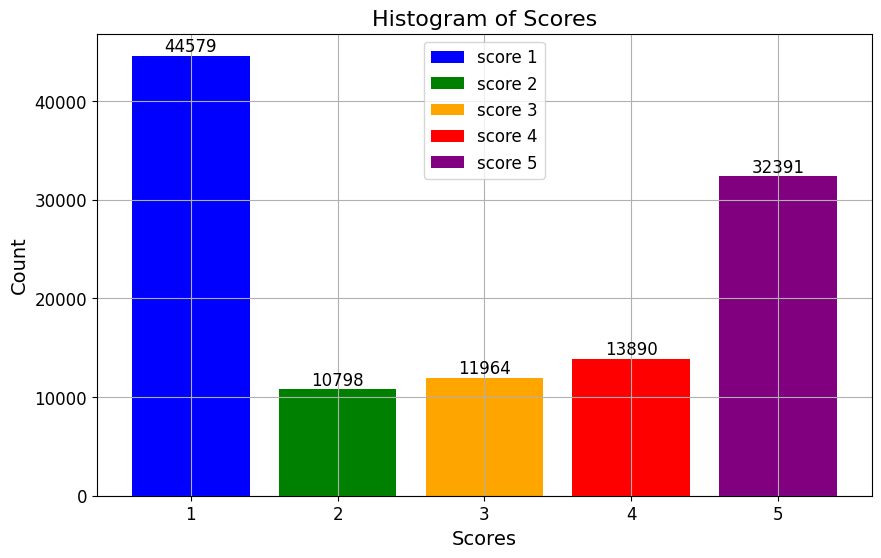

In [23]:
score_counts = df['score'].value_counts().sort_index()
colors = ['blue', 'green', 'orange', 'red', 'purple']

plt.figure(figsize=(10, 6))
bars = plt.bar(score_counts.index, score_counts.values, color=colors)

# Interaction
mplcursors.cursor(bars)

plt.title('Histogram of Scores', fontsize = 16) 
plt.xlabel('Scores', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(True)

# Menambahkan nilai masing-masing bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom', fontsize=12)

plt.legend(bars, ['score 1', 'score 2', 'score 3', 'score 4', 'score 5'], fontsize=12)
plt.show()

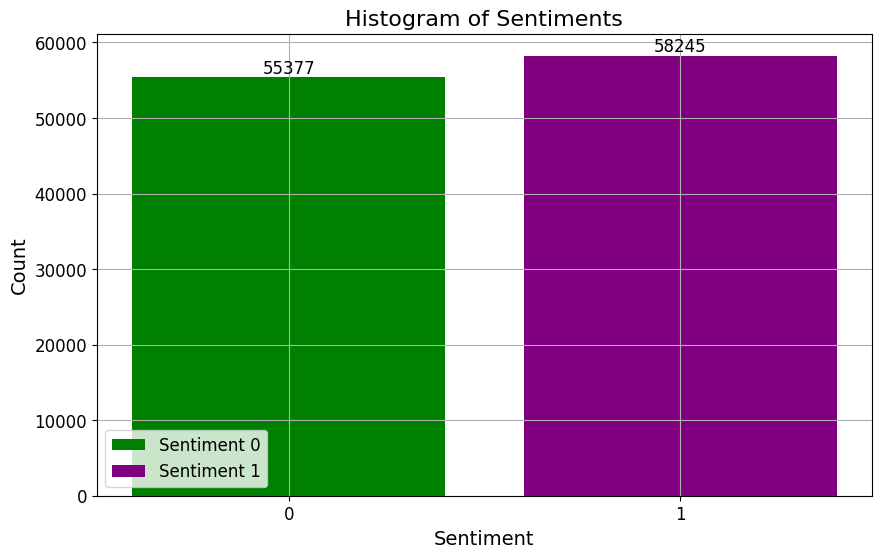

In [24]:
sentiment_counts = df['sentiment'].value_counts().sort_index()
colors = ['green', 'purple']

plt.figure(figsize=(10, 6))
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors, tick_label=sentiment_counts.index)
plt.title('Histogram of Sentiments', fontsize = 16) 
plt.xlabel('Sentiment', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(True)

# Menambahkan nilai masing-masing bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Interaction
mplcursors.cursor(bars)

plt.legend(bars, ['Sentiment 0', 'Sentiment 1'], fontsize=12)
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113622 entries, 0 to 113621
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   reviewId       113622 non-null  object
 1   content        113622 non-null  object
 2   score          113622 non-null  int64 
 3   thumbsUpCount  113622 non-null  int64 
 4   at             113622 non-null  object
 5   sentiment      113622 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 5.2+ MB


#### Convert Text in Content Column

In [26]:
def pre_process_text(text):
    """
    This function takes as input a text and performs the following preprocessing on it:
    1. lower the text
    2. convert emojis into their english names
    3. remove special characters and punctuations
    4. remove urls
    5. remove all punctuations
    6. remove extra whitespaces
    """
    
    text = text.lower() # lower all the characters in the text
    
    for x in text: # If a text contains an emoji, convert that emoji into its english name
        if emoji.is_emoji(x):
            demojized = emoji.demojize(x).split("_")
            demojized_string = " ".join(demojized)
            text = text.replace(x, demojized_string)

    text = re.sub(r'[@#$%^&*()\-<>+=?/`~!;:><]', ' ', text) # Remove specific special characters

    text = re.sub(r'\bhttp\S+|www\S+', '', text) # Remove sentences starting with "http" or "www"

    text = re.sub(r'[^\w\s]', ' ', text) # Replace all punctuations with a whitespace

    text = re.sub(r'\s+', ' ', text) # Convert consecutive whitespaces into " "

    return text

In [27]:
# Apply to content column
df['content'] = df['content'].apply(pre_process_text)
df

,reviewId,content,score,thumbsUpCount,at,sentiment
0,7b2a264c-7bb5-4729-b3d2-2168f8a7855e,i pay 18 month for an app that s super glitchy...,2,1,2024-07-10 15:20:28,0
1,10faea27-b33d-40bb-b669-cf126438d525,netflix plzz this kdrama dubbed in hindi happi...,5,2,2024-07-10 15:03:37,1
2,61a10e0d-e868-4d87-aa30-f41d30285a3f,terrible app i can t watch anything because of...,1,0,2024-07-08 15:41:17,0
3,1a7ce341-afc6-46da-9d08-793582e8ed3c,i love two hearts two hearts to download it lo...,5,0,2024-07-07 17:47:19,1
4,1bd445c3-7f36-4717-810a-63c5533207d0,exceptional,5,1,2024-07-07 12:31:53,1
...,...,...,...,...,...,...
113617,a760ead9-e7aa-4ed1-a651-5c37c3600dac,i really like it there are so many movies and ...,5,0,2019-08-03 15:06:03,1
113618,4957f9e7-d7f4-4a52-9764-031cebcac83f,i love netflix i always enjoy my time using it,5,0,2022-08-15 16:16:30,1
113619,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,sound quality is very slow of movies,1,0,2020-08-17 07:26:58,0
113620,32870f7f-c461-4256-b602-75244ca60248,rate is very expensive bcos we see netflix sun...,1,0,2019-07-21 09:41:42,0


#### TF-IDF Vectorization

In [28]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['content'])

#### Clustering with K-Means

In [32]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
df['cluster'] = kmeans_labels

#### Dimensionality Reduction for Visualization

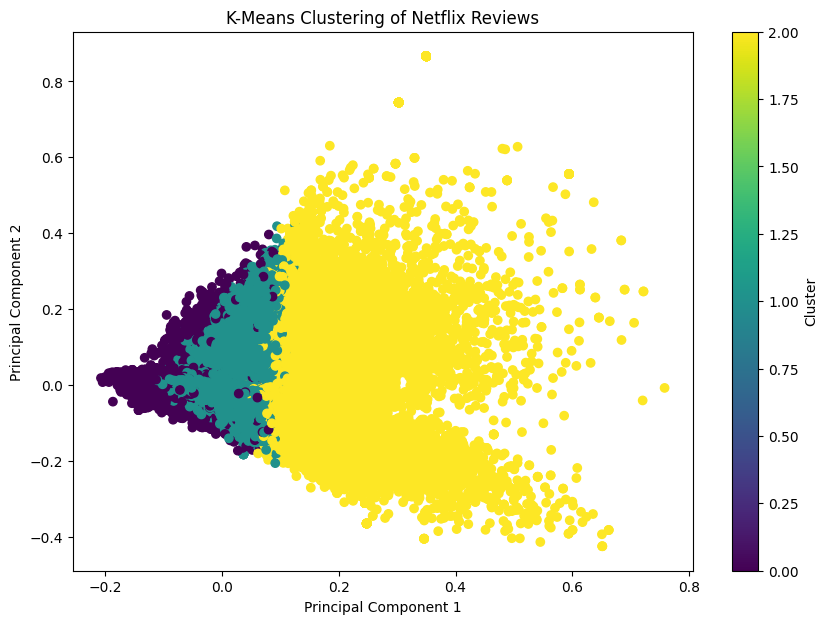

In [33]:
# Plotting the clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering of Netflix Reviews')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

#### Visualize the sentiment distribution in each cluster using bar plots

In [35]:
# Analyze the sentiment distribution in each cluster
cluster_sentiments = df.groupby('cluster')['sentiment'].value_counts(normalize=True).unstack()
print(cluster_sentiments)

sentiment         0         1
cluster                      
0          0.757470  0.242530
1          0.487648  0.512352
2          0.127406  0.872594


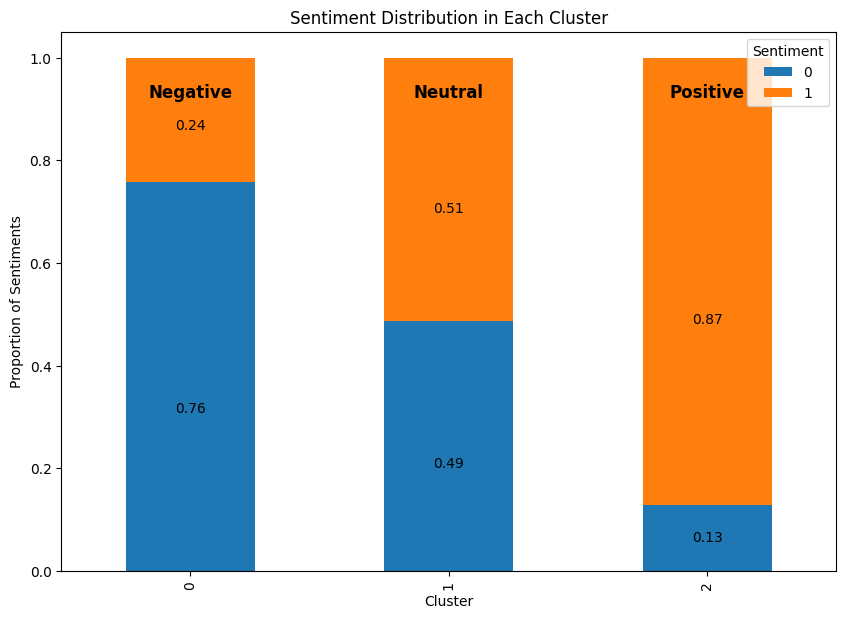

In [36]:
ax = cluster_sentiments.plot(kind='bar', stacked=True, figsize = (10, 7))

# Add annotations to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()/2.5), # Set the Annotation position in bar 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')
    
# Add labels for positive, negative, and neutral
for idx, row in cluster_sentiments.iterrows():
    pos_ratio = row[1] if 1 in row else 0
    neg_ratio = row[0] if 0 in row else 0
    label = ''
    if pos_ratio > 0.7:
        label = 'Positive'
    elif neg_ratio > 0.7:
        label = 'Negative'
    else:
        label = 'Neutral'
    ax.annotate(label, (idx, 1), ha='center', va='center', xytext=(0, -25), textcoords='offset points', fontsize=12, color='black', fontweight='bold')

plt.title('Sentiment Distribution in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion of Sentiments')
plt.legend(title='Sentiment', loc='upper right')
plt.show()

In [37]:
# Determine representation of each cluster
for cluster in cluster_sentiments.index:
    pos_ratio = cluster_sentiments.loc[cluster, 1] if 1 in cluster_sentiments.columns else 0
    neg_ratio = cluster_sentiments.loc[cluster, 0] if 0 in cluster_sentiments.columns else 0
    if pos_ratio > 0.7:
        print(f"Cluster {cluster} predominantly represents positive reviews.")
    elif neg_ratio > 0.7:
        print(f"Cluster {cluster} predominantly represents negative reviews.")
    else:
        print(f"Cluster {cluster} represents mixed or neutral reviews.")

Cluster 0 predominantly represents negative reviews.
Cluster 1 represents mixed or neutral reviews.
Cluster 2 predominantly represents positive reviews.


#### Clustering Evaluation

##### 1. Silhoutte Score

Silhouette Score measures how well objects are grouped in clusters. The silhouette value for each point is calculated based on the average distance to other points in the cluster and to points in different clusters.

`Steps:`

- Calculate Silhouette Score for various number of clusters.
- Silhouette Score plot against the number of clusters.
- Select the number of clusters that give the highest Silhouette Score or whose average value is close to 1.

`Value Parameters:`

Silhouette Score: Values ​​range from -1 to 1. Higher values ​​indicate that the clusters are better separated and denser.
- '>'0.5: Clusters are well separated.
- 0.25 - 0.5: Clusters are somewhat separated, but there may still be some overlap.
- <0.25: Clusters may overlap or have too much noise.

In [42]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, kmeans_labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.004249981396907406


##### 2. Elbow Method

The Elbow Method is used to determine the optimal number of clusters by plotting a graph of the Within-Cluster Sum of Squares (WCSS) value against the number of clusters.

`Steps:`

- Calculate WCSS for various number of clusters.
- Plot of WCSS against the number of clusters.
- Look for the "elbow" on the graph. This point usually indicates the optimal number of clusters.

`Value Parameters:`

- Number of Clusters: Select a value 𝑘 where the decline in WCSS slows down significantly. This is usually seen as the point where the curve begins to flatten.
- Interpretation: If the graph shows an "elbow" at 𝑘 = 3. k=3, this means 3 is probably the optimal number of clusters.

In [34]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow Method untuk menentukan jumlah cluster yang optimal
inertia = []
silhouette_scores = []

K = range(2, 11)  # Menentukan range untuk jumlah cluster
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_tfidf)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_tfidf, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bx-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster yang Optimal')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores untuk Berbagai Jumlah Cluster')
plt.show()


NameError: name 'X_tfidf' is not defined

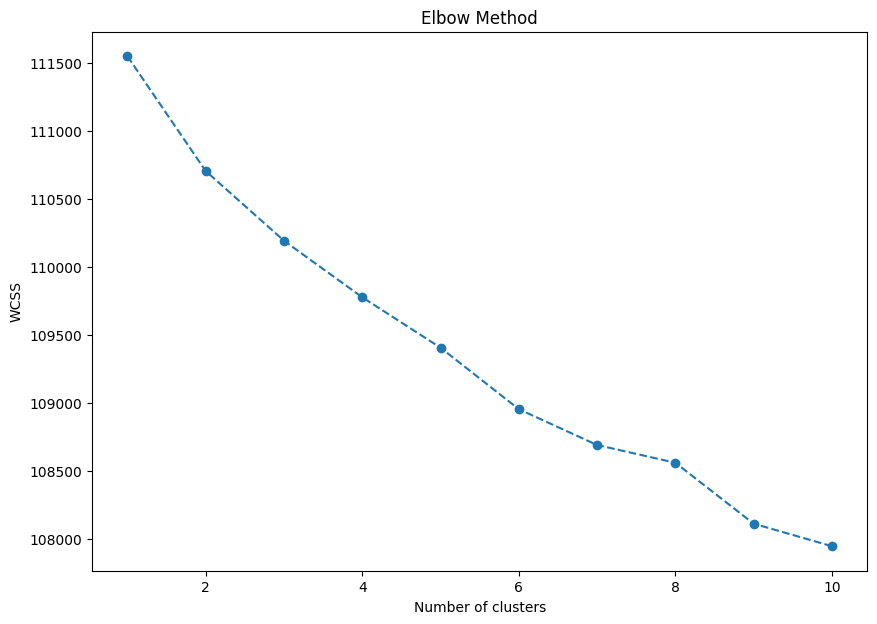

In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate the within-cluster sum of squares for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Analysis using WordCloud

In [ ]:
pip install WordCloud

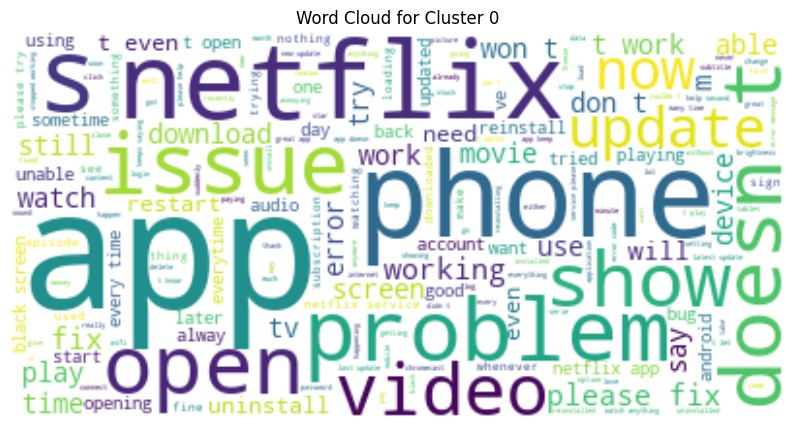

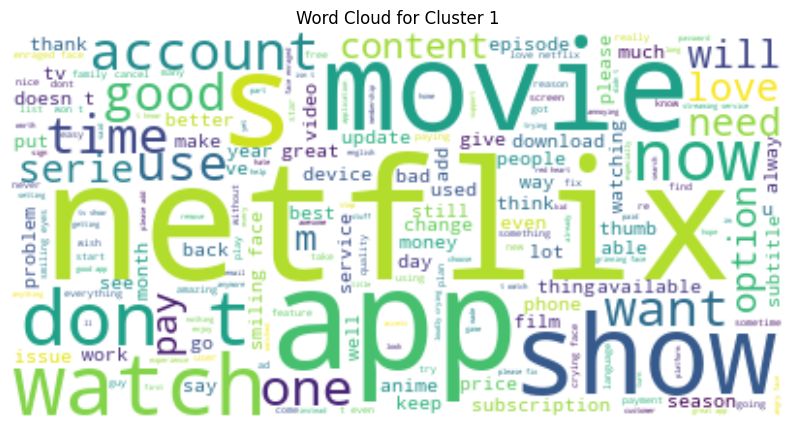

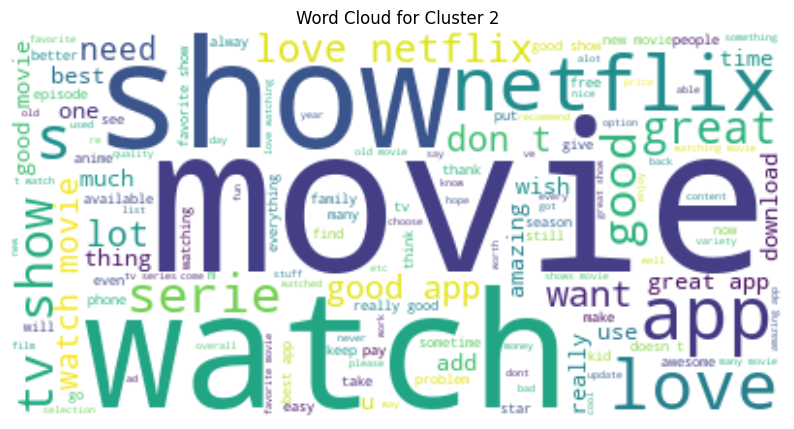

In [44]:
from wordcloud import WordCloud

def plot_word_cloud(text, title):
    wordcloud = WordCloud(background_color='white', max_words=200, contour_width=3, contour_color='steelblue').generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

for cluster in range(3):
    cluster_text = " ".join(df[df['cluster'] == cluster]['content'].values)
    plot_word_cloud(cluster_text, f'Word Cloud for Cluster {cluster}')

## 2. Modeling NLP

##### Import Necessary Library

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

#### Split Data

In [51]:
X = df['content']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### TF-IDF Vectorization

In [52]:
tfidf = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

#### Create Model using Naive Bayes

In [53]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

#### Model Evaluation

In [54]:
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8218701870187018
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82     11082
           1       0.84      0.80      0.82     11643

    accuracy                           0.82     22725
   macro avg       0.82      0.82      0.82     22725
weighted avg       0.82      0.82      0.82     22725



import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

X = df[['reviewId', 'content', 'score', 'thumbsUpCount', 'at']]
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))